# Ensemble : algoritmo Gradient Boosting

O objetivo é avaliar se um nódulo de mama é maligno ou benigno. Trata-se de dados de classificação de câncer de mama.



Modelo de Machine Learning para detecção do câncer de mama

Fonte: UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is downloaded from: https://goo.gl/U2Uwz2

Os dados também estão disponibilizados pela própria biblioteca, que possui um pacote de Datasets. 

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)


Algoritmo Gradient Boosting em um modelo de classificação.

De acordo com a documentação do Scikit-Learn, os parâmetros mais importantes na concepção do modelo são:
learning_rate: Taxa de aprendizado que determina a importância de cada árvore na concepção do modelo final e na minimização do resíduo gerado. Deve ser um valor no intervalo de 0.0 a 1.
n_estimators: Número de árvores ou estágios utilizados na construção e treinamento do modelo.
Também é possível controlar o tamanho de cada árvore através dos parâmetros:
max_depth: A profundidade máxima da árvore.
max_leaf_nodes: Número máximo de folhas.

Existem outros parâmetros que podem ser observados na documentação oficial.

Vamos criar um modelo simples com alguns desses parâmetros definidos de forma default, pelo próprio algoritmo:


In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
# importar o dataset em csv
data_path = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1"
df = pd.read_csv(data_path)
# eliminar uma coluna com erro
df.drop('Unnamed: 32', axis=1, inplace=True) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Com exceção da coluna diagnosis, todas as outras são do tipo numérica (int e float). Apesar dessa ser a nossa conclusão olhando as primeiras entradas, é prudente analisar por meio do atributo dtypes para ter certeza que nenhuma foi importada como string.

In [4]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		569
Colunas:	32


In [5]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
# Transformando a variável target

#opção 1
df['target'] = df['diagnosis'].map({'B': 0, 'M': 1}).astype(int)
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:

df.drop(['id','diagnosis'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation between different fearures')

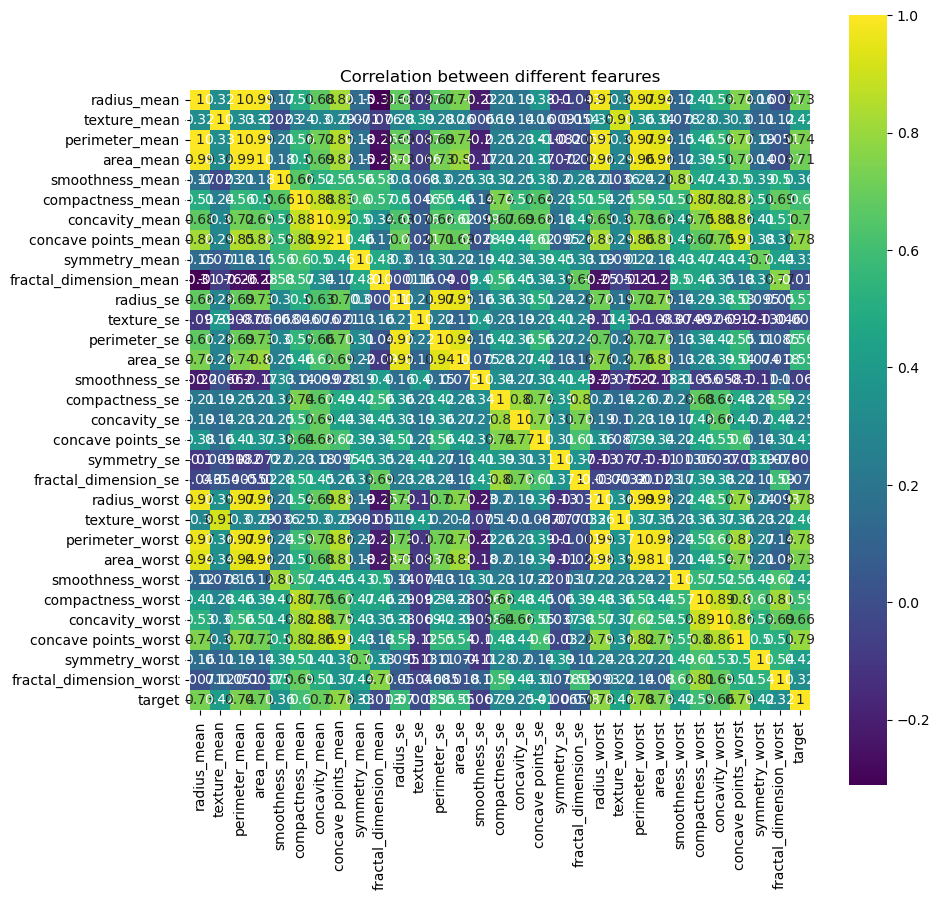

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

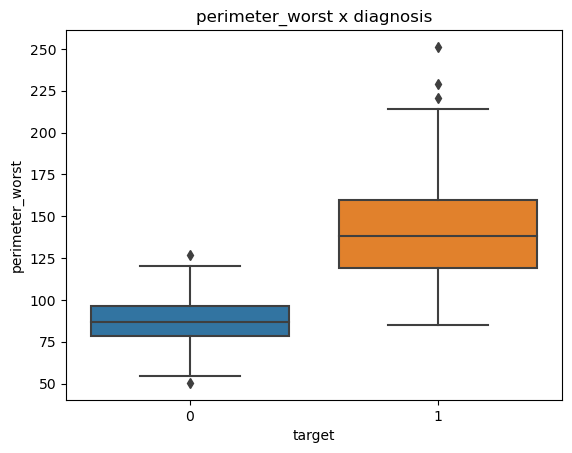

In [10]:
import matplotlib.pyplot as plt  
sns.boxplot(x='target', y='perimeter_worst', data=df)
plt.title('perimeter_worst x diagnosis')
plt.show()

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/seaborn/_core.py:1326:

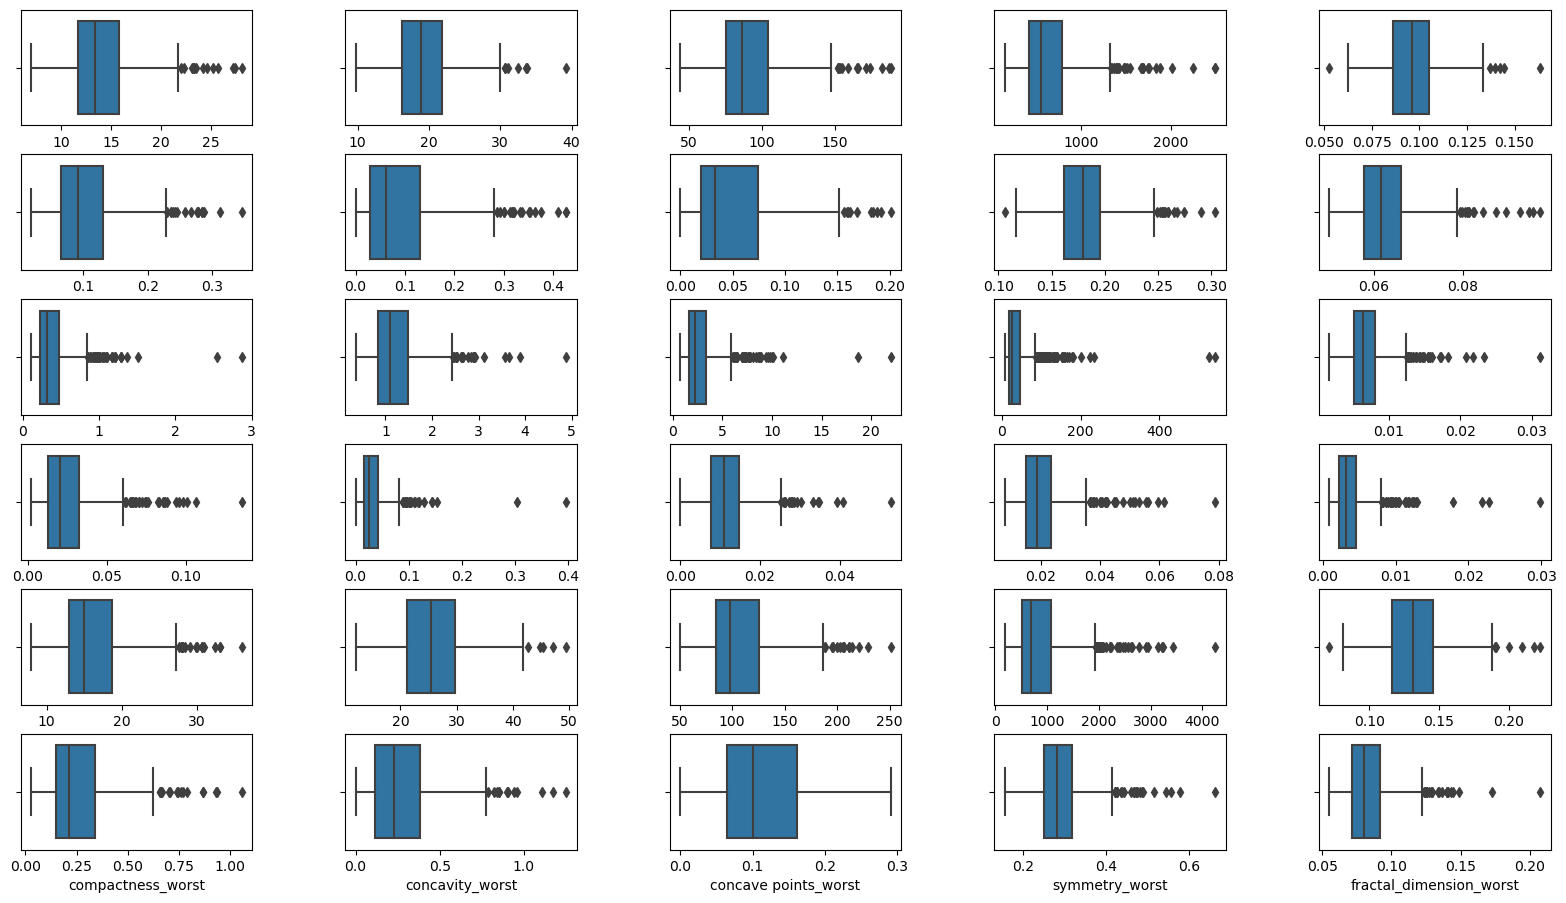

In [11]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = df
fig,axs=plt.subplots(nrows=6, ncols=5, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.boxplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4);

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


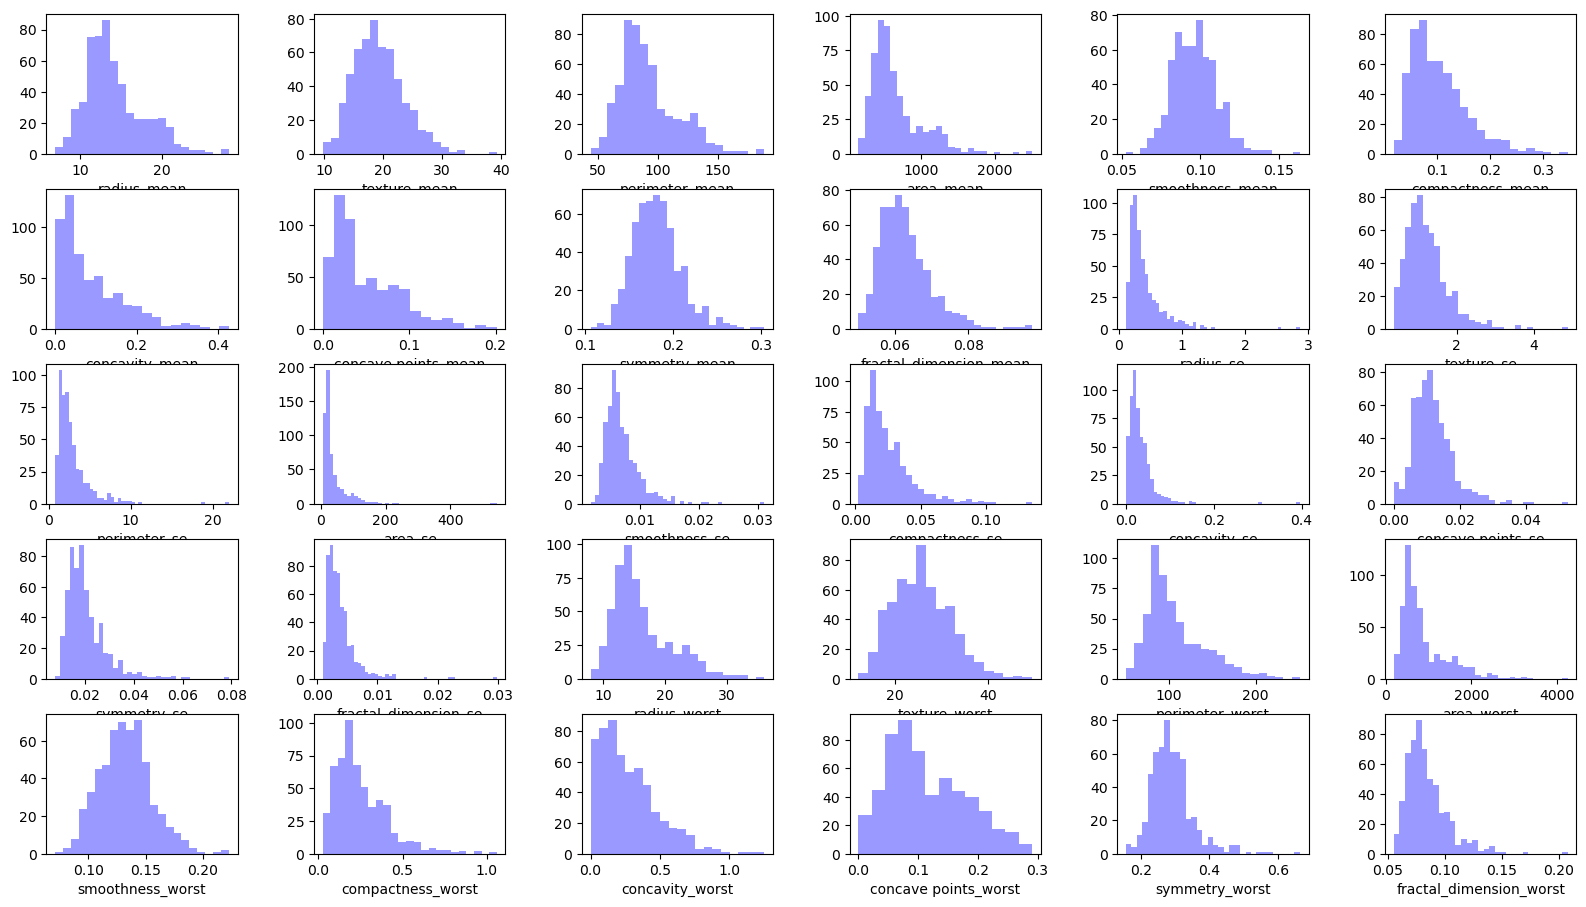

In [12]:
# Análise exploratória dos dados usando o gráfico histograma

features = df
fig,axs=plt.subplots(nrows=5, ncols=6, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.distplot(x, ax=ax, color="blue", kde=False)
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

In [13]:
from sklearn.model_selection import train_test_split
# separar as variáveis independentes da variável alvo
X = df.drop(['target'], axis=1)
y = df['target']

In [14]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),df['target'],test_size=0.30, random_state=17)


In [17]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,0.05504,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.017620,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
511,14.81,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.025410,0.1659,0.05348,...,15.61,17.58,101.70,760.2,0.11390,0.10110,0.11010,0.07955,0.2334,0.06142
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
339,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.141000,0.1797,0.05506,...,30.67,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.34,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.045280,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.12060,0.17220,0.23100,0.11290,0.2778,0.07012
390,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.019680,0.1800,0.06569,...,11.38,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722
143,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.030880,0.1778,0.06235,...,14.48,21.82,97.17,643.8,0.13120,0.25480,0.20900,0.10120,0.3549,0.08118


Documentação sobre XGBoost https://xgboost.readthedocs.io/en/stable/index.html
    
class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [18]:
model = GradientBoostingClassifier(random_state=17)


In [19]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=17)

In [20]:
y_predito = model.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predito)

0.9707602339181286

In [22]:
print('Acurácia %0f' % model.score(X_test, y_test))


Acurácia 0.970760


Podemos analisar o comportamento do algoritmo em cada etapa de ajuste através de um método chamado staged_predict.
Uma característica interessante desse método é que ele possibilita que façamos análises de desempenho que poderiam ser realizadas somente no modelo final, como medir a acurácia ou o erro médio do modelo. 
Essas análises são importantes, pois, pode nos auxiliar a determinar melhores parâmetros para o modelo.
A taxa de aprendizado determina a importância de cada árvore na concepção do modelo final e na minimização do resíduo gerado. Agora, utilizando o método staged_predict, vamos analisar o comportamento do algoritmo com alguns valores de learning_rate e analisar qual estágio o algoritmo irá atingir a minimização máxima do resíduo:


Segundo a documentação do algoritmo, existe uma troca entre os parâmetros n_estimators e learning_rate é evidente pelo gráfico gerado pelo algoritmo, que, em modelos treinados com uma taxa de aprendizado muito pequena, são necessários mais estágios para se chegar ao resíduo mínimo.


É recomendado a utilização de valores pequenos para o parâmetro learning_rate, visando manter a estabilidade do erro. 
Os valores recomendados são menores ou igual a 0.1, valor default definido pela biblioteca.
Se no exemplo anterior conseguimos identificar em qual estágio obtivemos o menor resíduo para cada taxa de aprendizado, então também podemos utilizar esse método para obter o número de ajustes ideal para o nosso modelo. 
Treinamos nosso modelo com 200 árvores com a taxa de 0.1 e limitamos a profundidade da árvore a 2. 

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np



In [24]:
model = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1)
model.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]

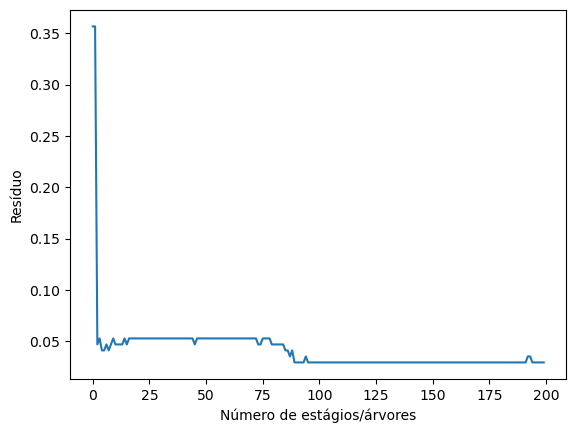

Acurácia 0.970760


In [25]:
plt.plot(errors)
plt.ylabel('Resíduo')
plt.xlabel('Número de estágios/árvores')
plt.show()
print('Acurácia %0f' % model.score(X_test, y_test))

In [26]:
best_n_estimators = np.argmin(errors) + 1
best_model = GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimators)
best_model.fit(X_train, y_train)
errors_best_model = [mean_squared_error(y_test, y_pred) for y_pred in best_model.staged_predict(X_test)]



In [27]:
best_model

GradientBoostingClassifier(max_depth=2, n_estimators=90)

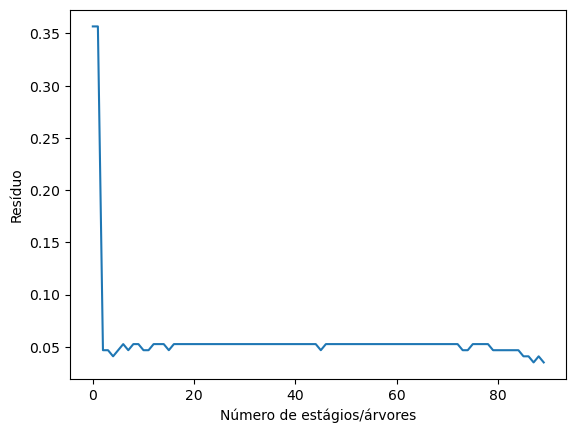

Acurácia 0.964912


In [28]:
plt.plot(errors_best_model)
plt.ylabel('Resíduo')
plt.xlabel('Número de estágios/árvores')
plt.show()
print('Acurácia %0f' % best_model.score(X_test, y_test))


Precisamos de apenas seis estágios de ajustes para melhorar nosso modelo, a acurácia agora foi de 96.27%, uma diferença pequena mas que pode ser um diferencial em problemas mais robustos.


O número de estágios que definimos no início funcionará como um número máximo de estágios e o nosso algoritmo sempre decidirá qual é o número ideal de estágios para uma melhor performance do nosso modelo.


In [ ]:
arvores = []
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [ ]:
for learning_rate in learning_rates:
    # Declara o modelo
    model = GradientBoostingClassifier(max_depth=2, n_estimators=1000, learning_rate=learning_rate)
    # Treina o modelo
    model.fit(X_train, y_train)
    # Obtem os erros/residuos encontrados em cada estagio do algoritmo
    errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
    best_number_of_estimators = np.argmin(errors)
    arvores.append(best_number_of_estimators + 1)



In [ ]:
plt.plot(learning_rates, arvores)
plt.ylabel('Numero de arvores/estágios')
plt.xlabel('Taxa de aprendizado')
plt.show()

In [ ]:
print('Acurácia %0f' % best_model.score(X_test, y_test))


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Resultado do classification_report:

Light Boosting
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [ ]:
# installing LightGBM (Required in Jupyter Notebook and 
# few other compilers once)

!pip install lightgbm
  
# Importing Required Library
import pandas as pd
import lightgbm as lgb
  
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier
  


In [ ]:
  
# Creating an object for model and fitting it on training data set 
model = LGBMClassifier()
model.fit(X_train, y_train)

LightGBM classifier.

__init__(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)

Alguns parâmetros importantes::

max_depth: define um limite para a profundidade da árvore. O valor padrão é 20. É eficaz no controle do ajuste.
categorical_feature: especifica o recurso categórico usado para o modelo de treinamento. 
bagging_fraction: especifica a fração de dados a ser considerada para cada iteração.
num_iterations: especifica o número de iterações a serem realizadas. O valor padrão é 100.
num_leaves: especifica o número de folhas em uma árvore. Deve ser menor que o quadrado de max_depth .
max_bin: especifica o número máximo de caixas para armazenar os valores do recurso.
min_data_in_bin: especifica a quantidade mínima de dados em um bin.
feature_fraction : especifica a fração de recursos a serem considerados em cada iteração. O valor padrão é um.

In [ ]:
  
# Predicting the Target variable
pred = model.predict(X_test)
print(pred)


In [ ]:
accuracy = model.score(X_test, y_test)
print(accuracy)

Ajuste de parâmetro
Alguns parâmetros importantes e seu uso estão listados abaixo:

max_depth: define um limite para a profundidade da árvore. O valor padrão é 20. É eficaz no controle do ajuste.
categorical_feature: especifica o recurso categórico usado para o modelo de treinamento. 
bagging_fraction: especifica a fração de dados a ser considerada para cada iteração.
num_iterations: especifica o número de iterações a serem realizadas. O valor padrão é 100.
num_leaves: especifica o número de folhas em uma árvore. Deve ser menor que o quadrado de max_depth .
max_bin: especifica o número máximo de caixas para armazenar os valores do recurso.
min_data_in_bin: especifica a quantidade mínima de dados em um bin.
tarefa: especifica a tarefa que desejamos realizar, que é treinamento ou previsão. A entrada padrão é train . Outro valor possível para este parâmetro é a previsão.
feature_fraction : especifica a fração de recursos a serem considerados em cada iteração. O valor padrão é um.

XGBoost (Extreme Gradient Boosting)

In [ ]:
# Documentação sobre XGBoost https://xgboost.readthedocs.io/en/stable/index.html

!pip install  xgboost

In [ ]:
import warnings
warnings.simplefilter('ignore')
# Import XGBoost
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier

In [ ]:
xgb = xgboost.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.01, n_jobs=-1)
bst = xgb.fit(X_train, y_train)


In [ ]:
y_predito = xgb.predict(X_test)
accuracy_score(y_test, y_predito)

In [ ]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, y_predito)
confusion_matrix

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['0', '1'])
disp.plot();


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predito))

# Resultado do classification_report:

In [ ]:
from xgboost import plot_importance
    
# Plot feature importance
plot_importance(xgb);

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())



In [ ]:
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

Usando RandomForest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df.drop(['target'], axis=1)
y = df['target']


# padronizar as colunas numéricas
X= StandardScaler().fit_transform(X)
# label encoder na variável alvo
y= LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


In [ ]:
y

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# instanciando o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators = 10,max_depth=3, criterion='entropy', random_state = 17)
# treinando o modelo
rf_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# realizar as previsões no dataset de teste
y_pred = rf_model.predict(X_test)
# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))
# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred))

In [ ]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])
